# Book Comparison
## Can we find similarities between books using NLP techniques

In [1]:
from collections import Counter
import matplotlib.pyplot as plt
import codecs
import gensim
from gensim.corpora.dictionary import Dictionary
from gensim.matutils import softcossim
import gensim.downloader as api
from gensim import corpora
import re
import pandas as pd
import numpy as np
import nltk
from nltk.stem import WordNetLemmatizer
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
from nltk.corpus import stopwords
import math

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/cwoodall6/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/cwoodall6/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /Users/cwoodall6/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
from IPython.display import display_html
def display_side_by_side(*args):
    html_str=''
    for df in args:
        html_str+=df.to_html()
    display_html(html_str.replace('table','table style="display:inline"'),raw=True)

In [3]:
def get_text(name):
    text = u""
    path = './final_project_data/' + name
    with codecs.open(path, "r", "utf-8") as book_file:
      text += book_file.read()
    return text 

In [4]:
def sentence_to_wordlist(raw):
    '''Remove all characters except letters'''
    clean = re.sub("[^a-zA-Z]"," ", raw)
    words = clean.split()
    return words

In [5]:
def remove_stops(text):
    enlgish_stops = set(stopwords.words('english'))
    no_stops = []
    for sentence in text:
        raw_nostop_sentence = []
        for word in sentence:
            if word.lower() not in enlgish_stops:
                raw_nostop_sentence.append(word.lower())
        no_stops.append(raw_nostop_sentence)
    return no_stops

In [6]:
def lemmatize(text):
    wordnet_lemmatizer = WordNetLemmatizer()

    lemmatized = []
    for sentence in text:
        for word in sentence:
            lemmatized.append(wordnet_lemmatizer.lemmatize(word))
    return lemmatized

In [7]:
def process_text(text):
    sentences = []
    for raw_sentence in raw_sentences:
        if len(raw_sentence) > 0:
            sentences.append(sentence_to_wordlist(raw_sentence))
    sentences = remove_stops(sentences)
    sentences = lemmatize(sentences)
    return sentences

In [8]:
book_list = ['A_Dolls_House_by_Henrik_Ibsen.rtf',
            'A_Tale_of_Two_Cities_by_Charles_Dickens.rtf',
            'Adventures_of_Huckleberry_Finn_by_Mark_Twain.rtf',
            'Alices_Adventures_in_Wonderland_by_Lewis_Carroll.rtf',
            'Dracula_by_Bram_Stoker.rtf',
            'Emma_by_Jane_Austen.rtf',
            'Frankenstein_by_Mary_Shelley.rtf',
            'Great_Expectations_by_Charles_Dickens.rtf',
            'Grimms_Fairy_Tales_by_The_Brothers_Grimm.rtf',
            'Metamorphosis_by_Franz_Kafka.rtf',
            'Pride_and_Prejudice_by_Jane_Austen.rtf',
            'The_Adventures_of_Sherlock_Holmes_by_Arthur_Conan_Doyle.rtf',
            'The_Adventures_of_Tom_Sawyer_by_Mark_Twain.rtf',
            'The_Count_of_Monte_Cristo_by_Alexandre_Dumas.rtf',
            'The_Importance_of_Being_Earnest_by_Oscar_Wilde.rtf',
            'The_Picture_of_Dorian_Gray_by_Oscar_Wilde.rtf',
            'The_Prince_by_Nicolo_Machiavelli.rtf',
            'The_Romance_of_Lust_by_Anonymous.rtf',
            'The_Yellow_Wallpaper_by_Charlotte_Perkins_Gilman.rtf',
            'Ulysses_by_James_Joyce.rtf']

In [9]:
tokenizer = nltk.data.load('tokenizers/punkt/english.pickle')

dataframes = []
documents = []
for book in book_list:
    print('Adding: ' + book)
    raw_sentences = tokenizer.tokenize(get_text(book))
    corpus = process_text(raw_sentences)
    bow = Counter(corpus)
    documents.append(bow)
    df = pd.DataFrame.from_dict(bow, orient='index').reset_index()
    df = df.rename(columns={'index':'word', 0:'count'})
    df = df.sort_values(by=['count'], ascending=False)
    dataframes.append(df)

Adding: A_Dolls_House_by_Henrik_Ibsen.rtf
Adding: A_Tale_of_Two_Cities_by_Charles_Dickens.rtf
Adding: Adventures_of_Huckleberry_Finn_by_Mark_Twain.rtf
Adding: Alices_Adventures_in_Wonderland_by_Lewis_Carroll.rtf
Adding: Dracula_by_Bram_Stoker.rtf
Adding: Emma_by_Jane_Austen.rtf
Adding: Frankenstein_by_Mary_Shelley.rtf
Adding: Great_Expectations_by_Charles_Dickens.rtf
Adding: Grimms_Fairy_Tales_by_The_Brothers_Grimm.rtf
Adding: Metamorphosis_by_Franz_Kafka.rtf
Adding: Pride_and_Prejudice_by_Jane_Austen.rtf
Adding: The_Adventures_of_Sherlock_Holmes_by_Arthur_Conan_Doyle.rtf
Adding: The_Adventures_of_Tom_Sawyer_by_Mark_Twain.rtf
Adding: The_Count_of_Monte_Cristo_by_Alexandre_Dumas.rtf
Adding: The_Importance_of_Being_Earnest_by_Oscar_Wilde.rtf
Adding: The_Picture_of_Dorian_Gray_by_Oscar_Wilde.rtf
Adding: The_Prince_by_Nicolo_Machiavelli.rtf
Adding: The_Romance_of_Lust_by_Anonymous.rtf
Adding: The_Yellow_Wallpaper_by_Charlotte_Perkins_Gilman.rtf
Adding: Ulysses_by_James_Joyce.rtf


In [10]:
def get_cosine(vec1, vec2):
    intersection = set(vec1.keys()) & set(vec2.keys())
    numerator = sum([vec1[x] * vec2[x] for x in intersection])

    sum1 = sum([vec1[x] ** 2 for x in list(vec1.keys())])
    sum2 = sum([vec2[x] ** 2 for x in list(vec2.keys())])
    denominator = math.sqrt(sum1) * math.sqrt(sum2)

    if not denominator:
        return 0.0
    else:
        return float(numerator) / denominator
    
# code snippet from https://stackoverflow.com/questions/15173225/calculate-cosine-similarity-given-2-sentence-strings

## Let's Compare
First let's see the similarity between 2 random books then look at there dataframes.

In [11]:
random1 = np.random.randint(len(book_list))
random2 = np.random.randint(len(book_list))
 
cosine = get_cosine(documents[random1], documents[random2])
print('Percent Similarty between {} and {}: {}'.format(book_list[random1], book_list[random2], cosine*100))
display_side_by_side(dataframes[random1].head(25), dataframes[random2].head(25))

Percent Similarty between Ulysses_by_James_Joyce.rtf and The_Yellow_Wallpaper_by_Charlotte_Perkins_Gilman.rtf: 44.581578197061475


,word,count
166,said,1208
4064,bloom,1001
1117,mr,922
185,one,761
157,like,747
535,say,738
130,stephen,580
213,old,492
355,hand,464
973,time,461


## Visualize

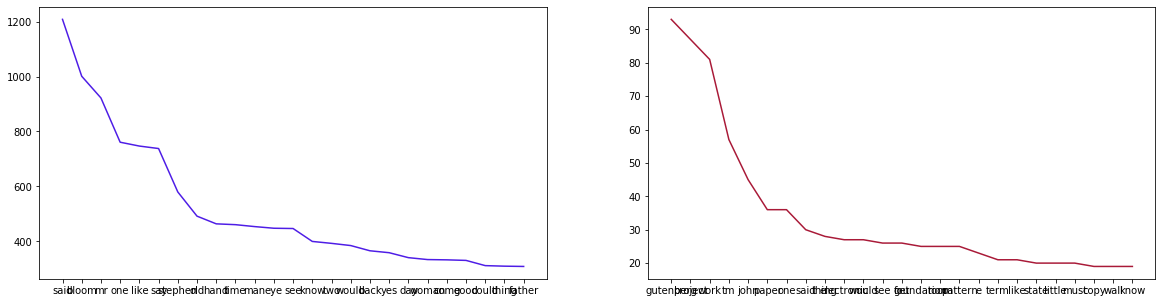

In [12]:
figure = plt.figure(figsize=(20, 5))
plt.subplot(1, 2, 1)
plt.plot(dataframes[random1]['word'][:25], dataframes[random1]['count'][:25], color=np.random.rand(3))
plt.subplot(1, 2, 2)
plt.plot(dataframes[random2]['word'][:25], dataframes[random2]['count'][:25], color=np.random.rand(3))
plt.show()

# Most Similar and Least Similar

In [22]:
max_cosine = 0
max_index = [0, 0]
min_cosine = 100
min_index = [0, 0]

for i, book1 in enumerate(documents):
    for j, book2 in enumerate(documents):
        if i == j:
            continue
        else: 
            cosine = get_cosine(book1, book2)
            print('Percent Similarty between {} and {}: {}'.format(book_list[i], book_list[j], cosine*100))
            if cosine > max_cosine:
                max_cosine = cosine
                max_index = [i, j]
            elif cosine < min_cosine:
                min_cosine = cosine
                min_index = [i,j]
print('\n\n---')
print('Highest Similartiy is between {} and {} at {}%'.format(book_list[max_index[0]], book_list[max_index[1]], max_cosine))
print('Lowest Similartiy is between {} and {} at {}%'.format(book_list[min_index[0]], book_list[min_index[1]], min_cosine))

Percent Similarty between A_Dolls_House_by_Henrik_Ibsen.rtf and A_Tale_of_Two_Cities_by_Charles_Dickens.rtf: 39.0411817530915
Percent Similarty between A_Dolls_House_by_Henrik_Ibsen.rtf and Adventures_of_Huckleberry_Finn_by_Mark_Twain.rtf: 32.25012657955422
Percent Similarty between A_Dolls_House_by_Henrik_Ibsen.rtf and Alices_Adventures_in_Wonderland_by_Lewis_Carroll.rtf: 26.700199664543824
Percent Similarty between A_Dolls_House_by_Henrik_Ibsen.rtf and Dracula_by_Bram_Stoker.rtf: 38.49213327197567
Percent Similarty between A_Dolls_House_by_Henrik_Ibsen.rtf and Emma_by_Jane_Austen.rtf: 41.07167839533163
Percent Similarty between A_Dolls_House_by_Henrik_Ibsen.rtf and Frankenstein_by_Mary_Shelley.rtf: 29.284099174480318
Percent Similarty between A_Dolls_House_by_Henrik_Ibsen.rtf and Great_Expectations_by_Charles_Dickens.rtf: 37.8609481236709
Percent Similarty between A_Dolls_House_by_Henrik_Ibsen.rtf and Grimms_Fairy_Tales_by_The_Brothers_Grimm.rtf: 29.396656318264657
Percent Similarty 

# Once Again Let's Compare

In [25]:
display_side_by_side(dataframes[max_index[0]].head(25), dataframes[max_index[1]].head(25))
print('\n\n---\n\n')
display_side_by_side(dataframes[min_index[0]].head(25), dataframes[min_index[1]].head(25))

,word,count
652,said,661
239,mr,640
135,one,444
822,lorry,369
166,hand,364
740,would,343
178,time,318
2341,defarge,302
815,man,300
514,upon,291




---




,word,count
72,nora,709
71,helmer,332
76,mr,255
77,linde,225
196,yes,166
79,krogstad,161
75,rank,151
70,torvald,126
300,must,118
183,go,106


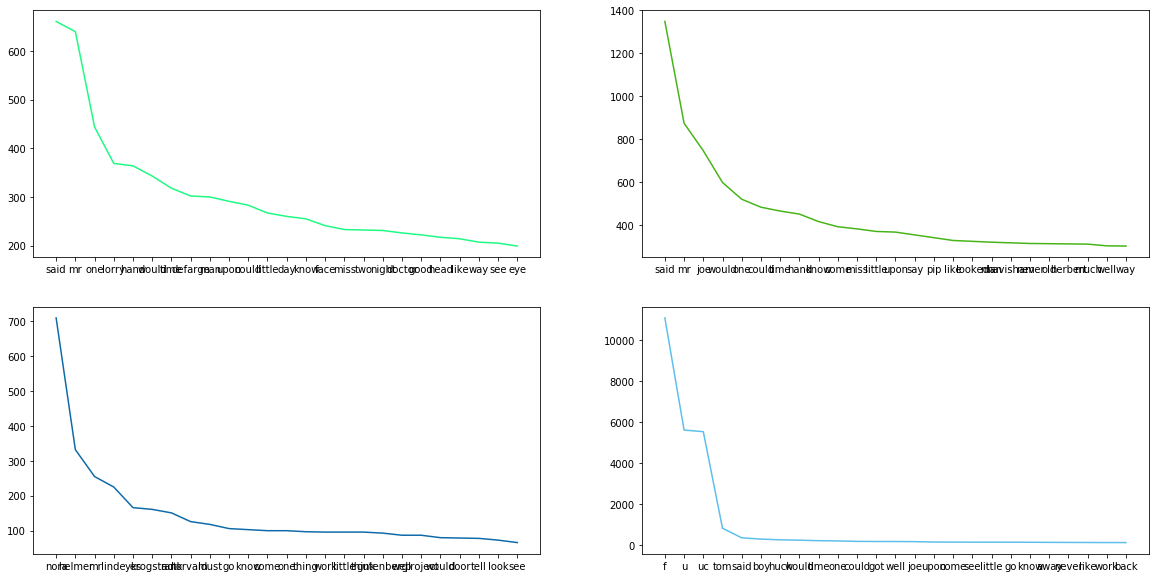

In [30]:
figure = plt.figure(figsize=(20, 10))
plt.subplot(2, 2, 1)
plt.plot(dataframes[max_index[0]]['word'][:25], dataframes[max_index[0]]['count'][:25], color=np.random.rand(3))
plt.subplot(2, 2, 2)
plt.plot(dataframes[max_index[1]]['word'][:25], dataframes[max_index[1]]['count'][:25], color=np.random.rand(3))
plt.subplot(2, 2, 3)
plt.plot(dataframes[min_index[0]]['word'][:25], dataframes[min_index[0]]['count'][:25], color=np.random.rand(3))
plt.subplot(2, 2, 4)
plt.plot(dataframes[min_index[1]]['word'][:25], dataframes[min_index[1]]['count'][:25], color=np.random.rand(3))
plt.show()